<a href="https://colab.research.google.com/github/AndreCauper/panorama-covid19-em-2020/blob/main/Ritmo_do_progresso_do_virus_COVID_19_no_mundo_e_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

#  Análise estatística no mundo e no Brasil do COVID-19

## O que é o COVID-19?
 A COVID-19 é uma doença infecciosa causada pelo coronavírus SARS-CoV-2 e tem como principais sintomas febre, cansaço e tosse seca. Outros sintomas menos comuns e que podem afetar alguns pacientes são: perda de paladar ou olfato, congestão nasal, conjuntivite, dor de garganta, dor de cabeça, dores nos músculos ou juntas, diferentes tipos de erupção cutânea, náusea ou vômito, diarreia, calafrios ou tonturas.


<center><img alt="Colaboratory logo" width="50%" src="https://img.freepik.com/vetores-gratis/fundo-realista-de-coronavirus_1393-281.jpg?w=826&t=st=1705945486~exp=1705946086~hmac=2e52857f3cd255bd3a1d635f9db4d9d675021c35d0614a396af1d8d5be9f1545"></center>

 ### Origem

 A epidemia começou na cidade de Wuhan, na China, em dezembro de 2019, mas rapidamente se espalhou para o mundo. As principais teorias levantadas incluíam o contato entre um ser humano e um animal infectado e um acidente em um laboratório na China.

<center><img alt="Colaboratory logo" width="50%" src=https://www.shutterstock.com/image-vector/blue-map-china-highlighted-red-260nw-1663067923.jpg></center>


 ### Pandemia x epidemia
 É importante nos atentarmos para as diferenças entre os conceitos de epidemia e pandemia. Uma epidemia faz referência a doenças que se disseminaram por uma região geográfica limitada, como uma cidade. Já o termo pandemia é utilizado para se referir a uma doença que se espalhou por um espaço geográfico muito grande, como um continente.

 Outras Pandemias que já assolaram a humanindade :
 * Tuberculose
 * Varíola
 * Gripe Espanhola
 * Peste Negra


### Mortes pelo COVID-19


Observou-se que os casos graves de covid-19 apresentam elevados níveis de citocinas pró-inflamatórias, sinalizando uma tempestade inflamatória.

Por conta dessa estimulação exagerada, as células que deveriam atacar o vírus passam a trazer danos para células saudáveis do pulmão e isso faz com que a pessoa tenha dificuldade de respirar. Além de acometer o pulmão, essa tempestade inflamatória pode levar a hiper-inflamação para outros órgãos mais distantes, como coração, rins e fígado, causando um estado de resposta inflamatória generalizada. O resultado pode ser fatal, levando a morte por falência múltipla de órgãos.

### Vacinas

 A ciência correu para criar uma vacina contra a doença, e os primeiros imunizantes ficaram prontos em meados de 2020. Até então, demorava mais de 10 anos para uma vacina ficar pronta, enquanto a que combate a Covid-19 chegou aos braços das pessoas em meses.

 <center><img alt="Colaboratory logo" width="50%" src=https://img.freepik.com/vetores-gratis/medico-injetando-vacina-em-um-paciente_23-2148857737.jpg?size=626&ext=jpg&ga=GA1.1.1124923478.1704984290&semt=sph></center>





Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no mundo e no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados para esta análise são os disponibilizados do link https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv, que foram obtidos do link https://covid19.who.int/WHO-COVID-19-global-data.csv. Algumas fontes de governos locais não atualizam ou não disponibilizam os dados em tempo mais ágil possível podendo aprensentar algumas informações desatualizadas.

Devido o avanço da doença ter ocorrido de forma acentuada, alguns dos registros podem ser sido lançados em períodos que não refletem os casos daque dia em específico(No Brasil, por exemplo, Os hospitais podem acabar tendo suas atividades tomadas em um rítmo menor e quando inicia a semana é que é lançada as informações de final de semana como se tivessem ocorrido no dia em que foram registrados no sistema).

A falta de cultura em trabalhar com dados no Brasil, faz comm que algumas  informações sejam inseridas de forma errada e até mesmo nem serem lançadas.

Espera-se que neste dataset podemos mensurar a quantidade de casos de covid pelo mundo e no Brasil



In [8]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

##Análise dos Dados
Para compreender um pouco dos dados a serem trabalhados neste dataset, precisamos ter uma visão geral do tipo de informação que eles carregam

In [9]:
#tamanho do dataset
print("quantidade de registro : ",df.shape[0])
print('numero de variaveis:', df.shape[1])

df.info()

quantidade de registro :  277191
numero de variaveis: 67
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277191 entries, 0 to 277190
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    277191 non-null  object 
 1   continent                                   263119 non-null  object 
 2   location                                    277191 non-null  object 
 3   date                                        277191 non-null  object 
 4   total_cases                                 48019 non-null   float64
 5   new_cases                                   52098 non-null   float64
 6   new_cases_smoothed                          50868 non-null   float64
 7   total_deaths                                44887 non-null   float64
 8   new_deaths                                  52106 non-null   float64
 9   new_deaths_sm

### **Dicionário de variáveis**

*   iso_code = norma internacional que atribui um codigo de tres letras referentes ao nome de cada país.                                    
*   continent = continente da localização geográfica                                
*   location = localização geográfica                                    
*   date = data da observação                                    
*   total_cases = total de casos confirmado de COVID-19. contagem pode incluir casos provaveis.                                
*   new_cases = novos casos confirmados de COVID-19                              
*   new_cases_smoothed novos casos confirmados de COVID-19 (casos suavizados)                        
*   total_deaths  = total de morte causada pelo COVID-19                             
*   new_deaths = novas mortes atribuidas ao COVID-19                               
*  new_deaths_smoothed = casos de morte de COVID-19(casos suavizados)                      
*  total_cases_per_million = total de casos  por covid a cada 1 milhao de pessoas                   
*  new_cases_per_million  = novos casos e covid a cada 1 milhão de pessoas                     
*  new_cases_smoothed_per_million  = novos casos por 1 milhão de pessoas (casos suavizados)           
*  total_deaths_per_million = total de morte por 1 milhão de pessoas                     
*  new_deaths_per_million = novas mortes por 1 milhão de pessoas                    
*  new_deaths_smoothed_per_million = novas mortes por 1 milhão de pessoas(casos suavizados)             
*  reproduction_rate                          
*  icu_patients = numero de pacientes em unidade de terapia intensiva                              
*  icu_patients_per_million = numero de pacientes em unidade de terapia intensiva por 1 milhão de pessoas                   
*  hosp_patients = número de pacientes de covid-19 em um dado dia                             
*  hosp_patients_per_million = numero de pacientes de covid 19 dados em um dia por 1 milhão de pessoas                   
*  weekly_icu_admissions = numero de pacientes de covid19 que deram  entrada unidade de terapia intensiva no hospital em uma semana                       
*  weekly_icu_admissions_per_million = numero de pacientes de covid19 que deram entrada em uma semana por 1 milhão de pessoas         
*  weekly_hosp_admissions = numero de pacientes de covid19 que deram entrada no hospital em um periodo de uma uma semana                    
*  weekly_hosp_admissions_per_million = numero de pacientes de covid 19 que entraram no hospital recentemente em um periodo de uma semana        
*  total_tests = total de teste para covid19                                
*  new_tests = novos testes para covid19                                 
*  total_tests_per_thousand = total de teste para covid19 por 1 mil pessoas      
*  new_tests_per_thousand = novos testes para covid19 por 1 mil pessoas                    
*  new_tests_smoothed =novos teste para covid19 (casos suavizados)                        
*  new_tests_smoothed_per_thousand = novos testes suavizados para covid19 a cada 1 mil pessoas            
*  positive_rate = taxa de casos positivos dada uma média de casos de uma semana                            
*  tests_per_case = testes para cada novo caso de covid19                            
*  tests_units = unidades de teste parra cada região                              
*  total_vaccinations = numero total de dose de covid19 administrada                        
*  people_vaccinated = total de pessoas que receberamm pelo menos uma dose da vacina                            
*  people_fully_vaccinated = total de pessoas que receberam todas as doses da vacina                    
*  total_boosters = total de does de reforço de administração                            
*  new_vaccinations = novas doses de vacinas administradas                           
*  new_vaccinations_smoothed = novas doses de vacinas administradas (casos suavizados)                   
*  total_vaccinations_per_hundred = numero total de vacinas administradas a ca 100 pessoas              
*  people_vaccinated_per_hundred  = numero total de pessoas vacianas a cada 100 pessoas            
*  people_fully_vaccinated_per_hundred  = numero total de pessoas a cada 100 que receberam todas as doses prescritas no protocolo      
*  total_boosters_per_hundred = numero total de doses de reforço a cada 100 pessoas              
*  new_vaccinations_smoothed_per_million  = total de novas doses administradas por 1 milhão de pessoas (casos suavizados)    
*  new_people_vaccinated_smoothed  = numero diario de pessoas que receberam sua primeiras dose (casos suavizados)           
*  new_people_vaccinated_smoothed_per_hundred = numero diario de pessoas que receberam sua primeira dose por 100 pessoas (casos suavizados)  
*  stringency_index = indice de rigos da resposta governamental                          
*  population_density = total de pessoas dividido pelo tamanho do territorio                       
*  median_age = media das idade da popupação no ano de 2020                              
*  aged_65_older = grupo da população que possui 65 anos ou mais no ano mais recente                            
*  aged_70_older = grupo da população que possui 75 anos ou mais apartir de 2015                            
*  gdp_per_capita = produto interno bruto em paridade com poder de compra                             
*  extreme_poverty  = grupo da população que está em pobreza extrema                          
*  cardiovasc_death_rate = taxa de morte por acidente cardiovascular                       
* diabetes_prevalence = prevalencia de diabetes                        
*  female_smokers  = quantidade de mulheres que sao fumantes                            
*  male_smokers = quantidade de homens que sao fumantes                               
*  handwashing_facilities = porcentagem da população que possui instalação para lavar as maos                       
*  hospital_beds_per_thousand = numero de camas de hospitais para cada 1000 pessoas                  
*  life_expectancy  = expectativa de vida de nascidos em 2019                          
*  human_development_index = indice de desenvolvimento humano                     
*  population = população                                
*  excess_mortality_cumulative_absolute  = diferença entre os numeros reportados de morte desde 01/01/2020 e o acumulado pelos proximos anos no mesmo periodo     
*  excess_mortality_cumulative  = diferença em porcentagem entre os numero acumulados de 01/01/2020-2021 e os projetados no mesmo periodo.              
*  excess_mortality  = diferença em porcentagem entre os numeros reportados de motes de 2020-2021 e o projetado para os proximos anos                         
*  excess_mortality_cumulative_per_million = data dp excessp de mortalidade acumulada por 1 milhao de pessoas   

In [ ]:
#mostrar 5 registros iniciais do dataset
df.head()

## Análise Exploratória dos Dados

Precisamos ver o volume de dados que do dataset, aos tipos e o seu significado. Este dataset tem um volume de dados e de variáveis bem grande e precisamos ver o tanto de informação que possui campos nulos e o formato útil da variável data

In [11]:
#volume de dados
print('quantidade de registros :', df.shape[0])
print('quantidade de variáveis :', df.shape[1])

quantidade de registros : 277191
quantidade de variáveis : 67


In [12]:
#convertendo a variavel date no tipo data
df.date = pd.to_datetime(df.date)

##fundamentos iniciais
Para esta análise será considerada como ponto de partida o intervalo de tempo do início dos registros até a data que a primeira pessoa no mundo foi vacinadas (13-12-2020).

In [13]:
#maiores casos de covid até a última data
df.loc[df['date']=='2020-12-13'].sort_values(by='total_cases',ascending=False)[:20]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
272455,OWID_WRL,NaN,World,2020-12-13,71655492.0,4394478.0,4023107.571,1730039.0,82462.0,69370.143,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
106498,OWID_HIC,NaN,High income,2020-12-13,34232722.0,2630416.0,2449312.429,770165.0,49668.0,39470.143,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
263064,OWID_UMC,NaN,Upper middle income,2020-12-13,21141078.0,1196369.0,942720.000,652862.0,22456.0,18587.571,...,NaN,NaN,NaN,NaN,NaN,2.525921e+09,NaN,NaN,NaN,NaN
80913,OWID_EUR,NaN,Europe,2020-12-13,19709016.0,1414311.0,1619090.000,493112.0,37766.0,33034.714,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
13465,OWID_ASI,NaN,Asia,2020-12-13,18887679.0,799058.0,754182.143,310517.0,10750.0,11169.286,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
180107,OWID_NAM,NaN,North America,2020-12-13,18711400.0,1634613.0,1186374.857,471025.0,23787.0,15922.000,...,NaN,NaN,NaN,NaN,NaN,6.003237e+08,NaN,NaN,NaN,NaN
260969,USA,North America,United States,2020-12-13,16012396.0,1468482.0,1063090.143,305721.0,17714.0,11043.143,...,24.600,NaN,2.770,78.86,0.926,3.382899e+08,391006.750,14.02,40.27,1163.91140
143437,OWID_LMC,NaN,Lower middle income,2020-12-13,15878599.0,548723.0,617811.857,297378.0,9979.0,11013.000,...,NaN,NaN,NaN,NaN,NaN,3.432097e+09,NaN,NaN,NaN,NaN
82109,OWID_EUN,NaN,European Union,2020-12-13,13022639.0,876975.0,1123185.143,329667.0,27178.0,24121.571,...,NaN,NaN,NaN,NaN,NaN,4.501468e+08,NaN,NaN,NaN,NaN
229341,OWID_SAM,NaN,South America,2020-12-13,11914346.0,431796.0,367527.143,397726.0,7729.0,7310.143,...,NaN,NaN,NaN,NaN,NaN,4.368167e+08,NaN,NaN,NaN,NaN


conforme retornado pela consulta anterior, alguns registros na coluna 'iso_code' possuem em seu nome um tipo de prefixo escrito em caixa alta OWID_. Isto é uma sigla que significa "OUR WORLD IN DATA" (NOSSO MUNDO EM DADOS) e ela carrega um valor da total de  cada região que ele precede. OWID_WRL, por exemplo, diz todos os casos que ocorreram no mundo. Estas informações não precisam aparecer nesta nossa análise porque queremos observar os casos por país individualmente

In [15]:
#novo dataset sem as regiões com OWID_
df_clean = df[~df["iso_code"].str.contains('OWID_')]

In [16]:
#selecionando os registros com data inferiores a 2020-12-13 para a variavel df_clean
df_clean = df_clean.loc[df['date']<='2020-12-13']


In [17]:
#selecionando os registros com data inferiores a 2020-12-13 para a variavel df
df =  df.loc[df['date']<='2020-12-13']

In [18]:
df_clean.loc[df_clean['date']=='2020-12-13'].sort_values(by='total_cases',ascending=False)[:7]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
260969,USA,North America,United States,2020-12-13,16012396.0,1468482.0,1063090.143,305721.0,17714.0,11043.143,...,24.6,NaN,2.77,78.86,0.926,3.382899e+08,391006.750,14.02,40.27,1163.91140
112638,IND,Asia,India,2020-12-13,9857029.0,212807.0,284602.571,143019.0,2837.0,3497.857,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
33650,BRA,South America,Brazil,2020-12-13,6836227.0,302259.0,211795.857,180437.0,4473.0,3423.714,...,17.9,NaN,2.20,75.88,0.765,2.153135e+08,NaN,NaN,NaN,NaN
205340,RUS,Europe,Russia,2020-12-13,2653928.0,193158.0,162864.429,46941.0,3800.0,2984.429,...,58.3,NaN,8.05,72.58,0.824,1.447133e+08,NaN,NaN,NaN,NaN
86895,FRA,Europe,France,2020-12-13,2161451.0,77674.0,164731.429,57032.0,3792.0,4495.857,...,35.6,NaN,5.98,82.66,0.901,6.781300e+07,43515.797,7.52,18.34,674.87225
259704,GBR,Europe,United Kingdom,2020-12-13,1883652.0,138488.0,140354.714,82631.0,3216.0,2974.571,...,24.7,NaN,2.54,81.32,0.932,6.750894e+07,72451.190,12.39,12.53,1080.40200
121056,ITA,Europe,Italy,2020-12-13,1826174.0,115784.0,188752.286,64036.0,4522.0,3832.286,...,27.8,NaN,3.18,83.51,0.892,5.903747e+07,94123.410,15.34,35.51,1581.89060


podemos verificar que os 7 países que estavam com os maiores casos de covid registrado
* Estados Unidos com 16.012.396
* Índia com 9.857.029
* Brasil com 6.836.227

Agora vamos verificar os casos de morte

In [19]:
#total de morte
df_clean.loc[df_clean['date']=='2020-12-13'].sort_values(by='total_deaths',ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
260969,USA,North America,United States,2020-12-13,16012396.0,1468482.0,1063090.143,305721.0,17714.0,11043.143,...,24.6,NaN,2.77,78.86,0.926,3.382899e+08,391006.75,14.02,40.27,1163.9114
33650,BRA,South America,Brazil,2020-12-13,6836227.0,302259.0,211795.857,180437.0,4473.0,3423.714,...,17.9,NaN,2.20,75.88,0.765,2.153135e+08,NaN,NaN,NaN,NaN
112638,IND,Asia,India,2020-12-13,9857029.0,212807.0,284602.571,143019.0,2837.0,3497.857,...,20.6,59.550,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
158325,MEX,North America,Mexico,2020-12-13,1311165.0,73050.0,52859.857,132958.0,4644.0,3861.000,...,21.4,87.847,1.38,75.05,0.779,1.275041e+08,282620.62,39.07,63.73,2243.0513
195888,PER,South America,Peru,2020-12-13,980943.0,10083.0,13975.286,90846.0,703.0,710.000,...,NaN,NaN,1.60,76.74,0.777,3.404959e+07,78368.70,50.97,5.93,2353.0776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255284,TUV,Oceania,Tuvalu,2020-12-13,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,67.57,NaN,1.133500e+04,NaN,NaN,NaN,NaN
265827,UZB,Asia,Uzbekistan,2020-12-13,9.0,0.0,0.000,NaN,0.0,0.000,...,24.7,NaN,4.00,71.72,0.720,3.462765e+07,NaN,NaN,NaN,NaN
266909,VUT,Oceania,Vanuatu,2020-12-13,1.0,0.0,0.143,NaN,0.0,0.000,...,34.5,25.209,NaN,70.47,0.609,3.267440e+05,NaN,NaN,NaN,NaN
267661,VAT,Europe,Vatican,2020-12-13,26.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,75.12,NaN,8.080000e+02,NaN,NaN,NaN,NaN


em relação às mortes, os países que lideraram até a data de 2020-12-13 eram:
* Estados Unidos com 305.721
* Brasil com 180.437
* Índia com 143.019

Para melhor visualização, vamos plotar um gráfico de barras

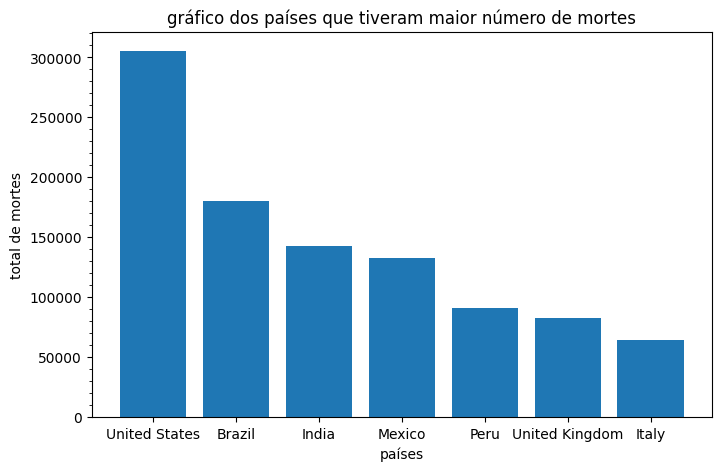

In [36]:
#plotando histograma dos
paises_liderando = df_clean.loc[df_clean['date']=='2020-12-13'].sort_values(by='total_deaths',ascending=False)[:7]
#cart = df_clean.loc[df_clean['date']=='2020-12-13',['location','total_deaths']].sort_values(by='total_deaths',ascending=False)[:7]

fig, ax = plt.subplots(figsize=(8,5))
ax.bar('location','total_deaths',data=paises_liderando)

ax.set_title('gráfico dos países que tiveram maior número de mortes')
ax.set_xlabel('países')
ax.set_ylabel('total de mortes')

ax.yaxis.set_minor_locator(plt.MultipleLocator(10000))
#ax.minorticks_on()



plt.show();

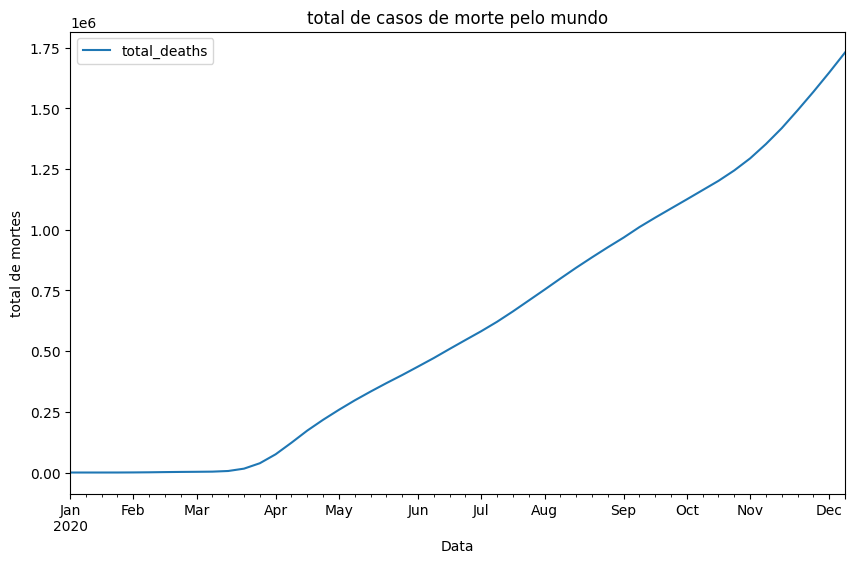

In [37]:
#gráfico do aumento de casos de morte pelo corona virus pelo mundo


df_world_total_deaths = df.loc[df['location']=='World', ['date', 'total_deaths']].dropna()
# Configurar a data como índice
df_world_total_deaths.set_index('date', inplace=True)

# Plotar o gráfico
df_world_total_deaths.plot(figsize=(10, 6))
plt.title('total de casos de morte pelo mundo')
plt.xlabel('Data')
plt.ylabel('total de mortes')

plt.show()





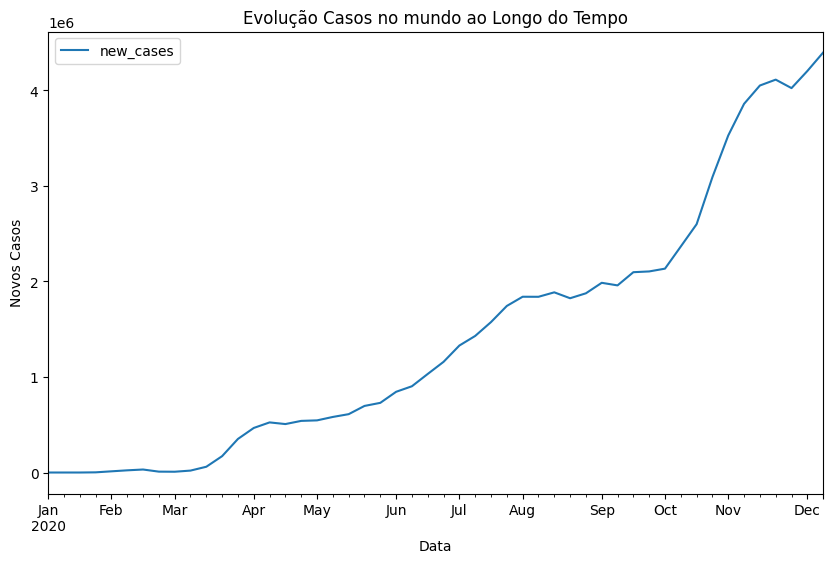

In [38]:
#Curva de aumento de novos casos pelo mundo
df_world_new_cases = df.loc[df['location']=='World', ['date', 'new_cases']].dropna()
# Configurar a data como índice
df_world_new_cases.set_index('date', inplace=True)

# Plotar o gráfico
df_world_new_cases.plot(figsize=(10, 6))
plt.title('Evolução Casos no mundo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Novos Casos')


plt.show()

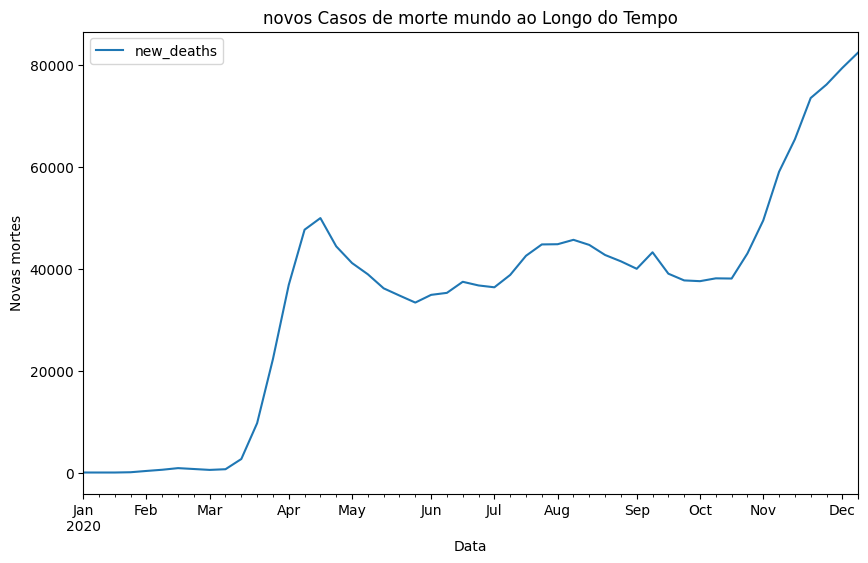

In [39]:
#Curva de aumento de novos casos pelo mundo
df_world_new_deaths = df.loc[df['location']=='World', ['date', 'new_deaths']].dropna()
# Configurar a data como índice
df_world_new_deaths.set_index('date', inplace=True)

# Plotar o gráfico
df_world_new_deaths.plot(figsize=(10, 6))
plt.title('novos Casos de morte mundo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Novas mortes')


plt.show()

### Análise Exploratória para o Brasil

Agora que já temos uma noção dos acontecimentos no mundo, vamos focar nos acontecimentos no Brasil.

In [63]:
#dataframe com dados apenas do brasil
df_brasil = df.loc[df['location']=="Brazil"]



In [21]:
#identificar quando foi o primeiro caso de covid19 no Brasil
df_brasil.loc[df_brasil['new_cases']!=0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
33374,BRA,South America,Brazil,2020-03-01,1.0,1.0,0.143,NaN,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


In [22]:
#identificar quando foi registrada as primeiras mortes no brasil
df_brasil.loc[df_brasil['new_deaths']!=0.0].sort_values(by='new_deaths',ascending=True).head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
33384,BRA,South America,Brazil,2020-03-22,904.0,820.0,129.143,11.0,11.0,1.571,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


Uma informação interessante para investigarmos é quanto tempo levou desde os primeiros casos até a primeira morte

In [25]:
#identificar quantos dias demorou para registrarmos a primeira morte considerando o primeiro caso de covid19 registrado
delta = df_brasil.date.loc[33384] - df_brasil.date.loc[33374]
print('se passaram {} dias entre o primeiro caso e as primeiras mortes no brasil'.format(delta.days))

se passaram 21 dias entre o primeiro caso e as primeiras mortes no brasil


In [40]:
#tamanho do dataset do brasil
df_brasil.shape
z1 = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

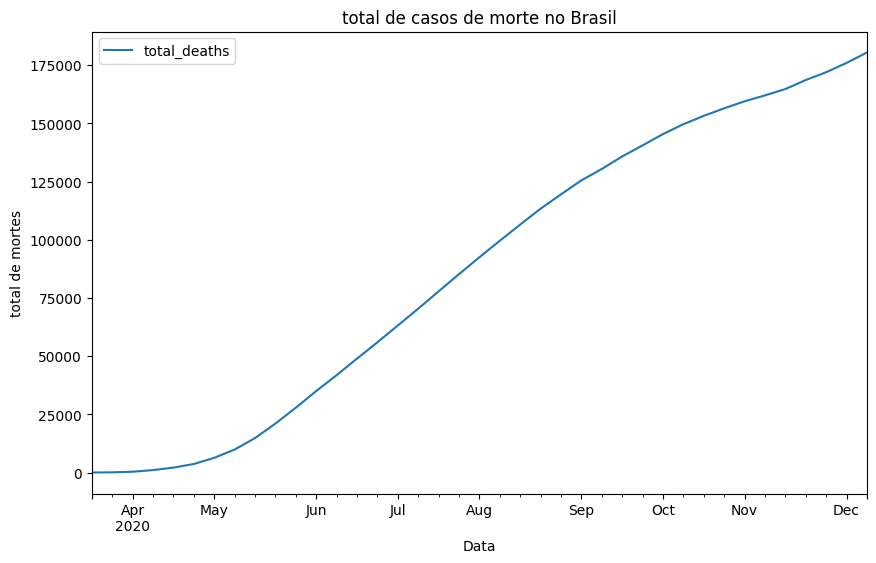

In [61]:
#gráfico do aumento de casos de morte pelo corona virus pelo mundo

df_brasil_total_deaths = df.loc[df['location']=='Brazil', ['date', 'total_deaths']].dropna()
# Configurar a data como índice
df_brasil_total_deaths.set_index('date', inplace=True)

# Plotar o gráfico
df_brasil_total_deaths.plot(figsize=(10, 6))
plt.title('total de casos de morte no Brasil')
plt.xlabel('Data')
plt.ylabel('total de mortes')

plt.show()



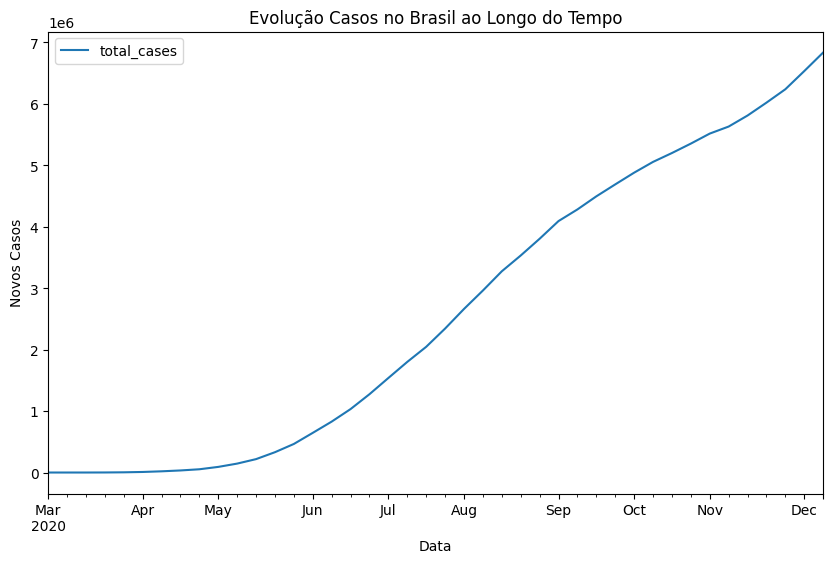

In [62]:
#Curva de aumento de novos casos No Brasil
df_brasil_total_cases = df.loc[df['location']=='Brazil', ['date', 'total_cases']].dropna()
# Configurar a data como índice
df_brasil_total_cases.set_index('date', inplace=True)

# Plotar o gráfico
df_brasil_total_cases.plot(figsize=(10, 6))
plt.title('Evolução Casos no Brasil ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Novos Casos')


plt.show()

Text(0, 0.5, 'Novas mortes')

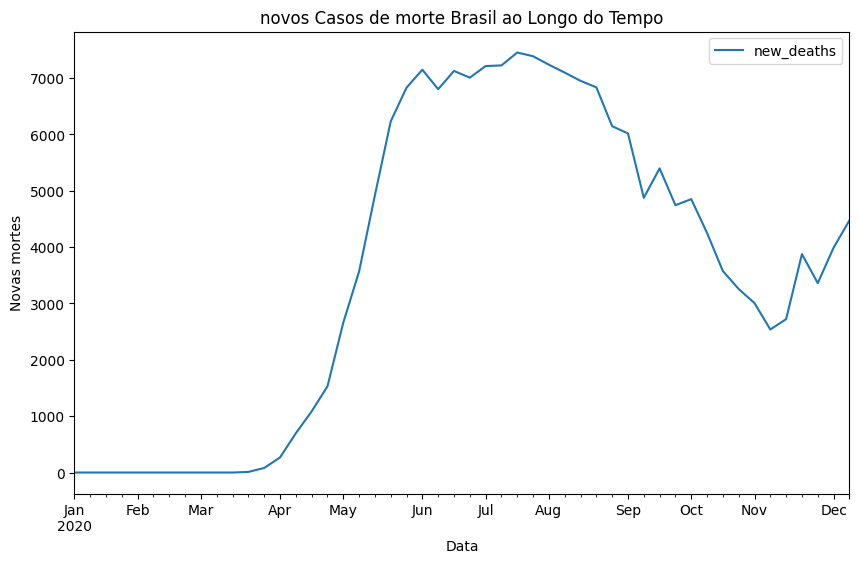

In [50]:
#Curva de novas mortes no Brazil
df_brasil_new_deaths = df.loc[df['location']=='Brazil', ['date', 'new_deaths']].dropna()
# Configurar a data como índice
df_brasil_new_deaths.set_index('date', inplace=True)

# Plotar o gráfico
df_brasil_new_deaths.plot(figsize=(10, 6))
plt.title('novos Casos de morte Brasil ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Novas mortes')


por fim, vamos plotamos os gráficos de linha para compararmos a evolução dos casos e mortes no Brasil.

## Conclusão

Um detalhe extremamente importante a ser destacado é que esses dados são medidos diariamente, e esse conjunto de dados ficará desatualizado "rapidamente".

* Até o final do ano de 2020, os Estados Unidos estavam liderando o ranking de covid no mundo, superando países como Índia
* A índia tendo uma população de mais de 1 bilhão de pessoas, teve um número menor de mortos menor que os Estados Unidos e o Brasil que possuiam à épooca em torno de 331 e 211 milhões de pessoas respectivamente.
* No ano de 2020 houve um período de 'estabilidade' quanto ao número de mortes por covid19 que foi da metade de maio até metade de outubro, grande parte deste mesmo peródo no Brasil foi um dos períodos que houveram grandes números de mortes por coovid19.
* No Brasil, as medidas de quarentenas foram implantadas em meados de março e abril os casos saltaram se comparado aos casos iniciais.
